In [6]:
import tensorflow as tf
import keras
import os
import pathlib
import matplotlib.pyplot as plt
import seaborn as sns

import imageio
import matplotlib.image as img
# data ogmintation
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import Sequential
from tensorflow.keras.datasets import cifar10
import numpy as np
from keras.utils import to_categorical


In [72]:
(x_train,y_train),(x_test,y_test) = cifar10.load_data()

In [73]:
x_train.shape

(50000, 32, 32, 3)

In [74]:
x_test.shape

(10000, 32, 32, 3)

In [75]:
classes = len(np.unique(y_train))
classes

10

In [76]:
y_train = to_categorical(y_train)
y_test =to_categorical(y_test)

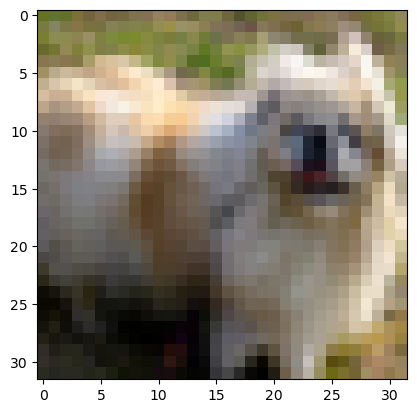

In [77]:
plt.imshow(x_train[40])

In [78]:
!pip install opencv-python

Defaulting to user installation because normal site-packages is not writeable


In [79]:
import cv2

In [80]:
def resize_img(img):
    number_image =img.shape[0]
    new_array =np.zeros((number_image,48,48,3))
    for i in range (number_image):
        new_array[i] = cv2.resize(img[i, :, :, :],(48,48))
    return new_array

In [81]:
x_train = resize_img(x_train)

In [82]:
x_test = resize_img(x_test)

In [83]:
print(x_train.shape)

(50000, 48, 48, 3)


In [84]:
print(x_test.shape)

(10000, 48, 48, 3)


In [85]:
model = Sequential ()

In [93]:
model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dense(120,activation = tf.keras.activations.relu))
model.add(tf.keras.layers.Dense(50,activation = tf.keras.activations.relu))

model.add(tf.keras.layers.Dense(10,activation = tf.keras.activations.sigmoid))

In [94]:
model.compile(optimizer = 'adam',
             loss = "categorical_crossentropy",
             metrics = "accuracy")

In [95]:
hist = model.fit(x_train,y_train,epochs = 5,validation_split =0.2)

Epoch 1/5
1250/1250 [==============================] - 18s 13ms/step - loss: 2.3032 - accuracy: 0.1001 - val_loss: 2.3025 - val_accuracy: 0.1025
Epoch 2/5
1250/1250 [==============================] - 17s 14ms/step - loss: 2.3028 - accuracy: 0.0981 - val_loss: 2.3028 - val_accuracy: 0.0953
Epoch 3/5
1250/1250 [==============================] - 17s 13ms/step - loss: 2.3027 - accuracy: 0.1004 - val_loss: 2.3028 - val_accuracy: 0.0977
Epoch 4/5
1250/1250 [==============================] - 17s 13ms/step - loss: 2.3027 - accuracy: 0.0983 - val_loss: 2.3029 - val_accuracy: 0.0953
Epoch 5/5
1250/1250 [==============================] - 17s 13ms/step - loss: 2.3028 - accuracy: 0.0989 - val_loss: 2.3028 - val_accuracy: 0.0979


In [96]:
print(hist.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


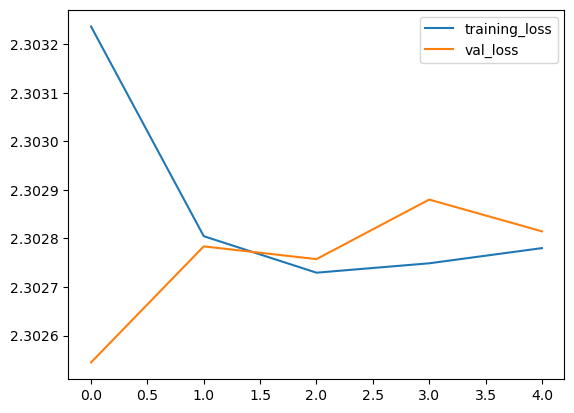

In [97]:
plt.plot(hist.history['loss'],label ="training_loss")
plt.plot(hist.history['val_loss'],label ="val_loss")
plt.legend()
plt.show()

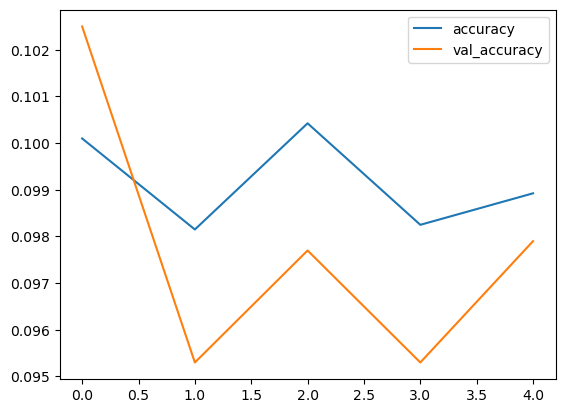

In [98]:
plt.plot(hist.history['accuracy'],label ="accuracy")
plt.plot(hist.history['val_accuracy'],label ="val_accuracy")
plt.legend()
plt.show()